# Get Data

In [461]:
# Only use full for Google colab
try:
    import google.colab
    print("Running on Google Colab")
    import subprocess

    def run_command(command):
        """Runs a command line command."""
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
        output, err = process.communicate()
        return output.decode("utf-8")
    run_command("wget https://raw.githubusercontent.com/anilkumarKanasani/tensorflow-deep-learning/main/Notebooks/helper_functions.py")
    print("Data Import completed on Google Colab")

except:
    print("Not running on Google Colab")

Not running on Google Colab


In [462]:
# pandas read csv with parse_dates as index_col
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                    parse_dates=['Date'],
                    index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [463]:
# rename columns Close to price (USD) to price
df.rename(columns={'Closing Price (USD)': 'Price'}, inplace=True)
df.head()

,Currency,Price,24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


We will use the Price column as the predicted variable and all the other numerical columns as features.

# Explore Data

In [464]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Currency        2787 non-null   object 
 1   Price           2787 non-null   float64
 2   24h Open (USD)  2787 non-null   float64
 3   24h High (USD)  2787 non-null   float64
 4   24h Low (USD)   2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [465]:
# Get the date range of the data
print(f"Earliest date: {df.index.min()}, \nLatest date: {df.index.max()}, \nNumber of days: {df.index.max() - df.index.min()}")

Earliest date: 2013-10-01 00:00:00, 
Latest date: 2021-05-18 00:00:00, 
Number of days: 2786 days 00:00:00


In [466]:
# Do we have a sample for every day?
print(f"Number of days in total: {len(df)}")
print(f"Number of days with samples: {len(df.index.unique())}")

Number of days in total: 2787
Number of days with samples: 2787


In [467]:
# Do we have any missing days?
print(f"Number of missing days: {len(df) - len(df.index.unique())}")

Number of missing days: 0


In [468]:
# missing values in the data
df.isna().sum()

Currency          0
Price             0
24h Open (USD)    0
24h High (USD)    0
24h Low (USD)     0
dtype: int64

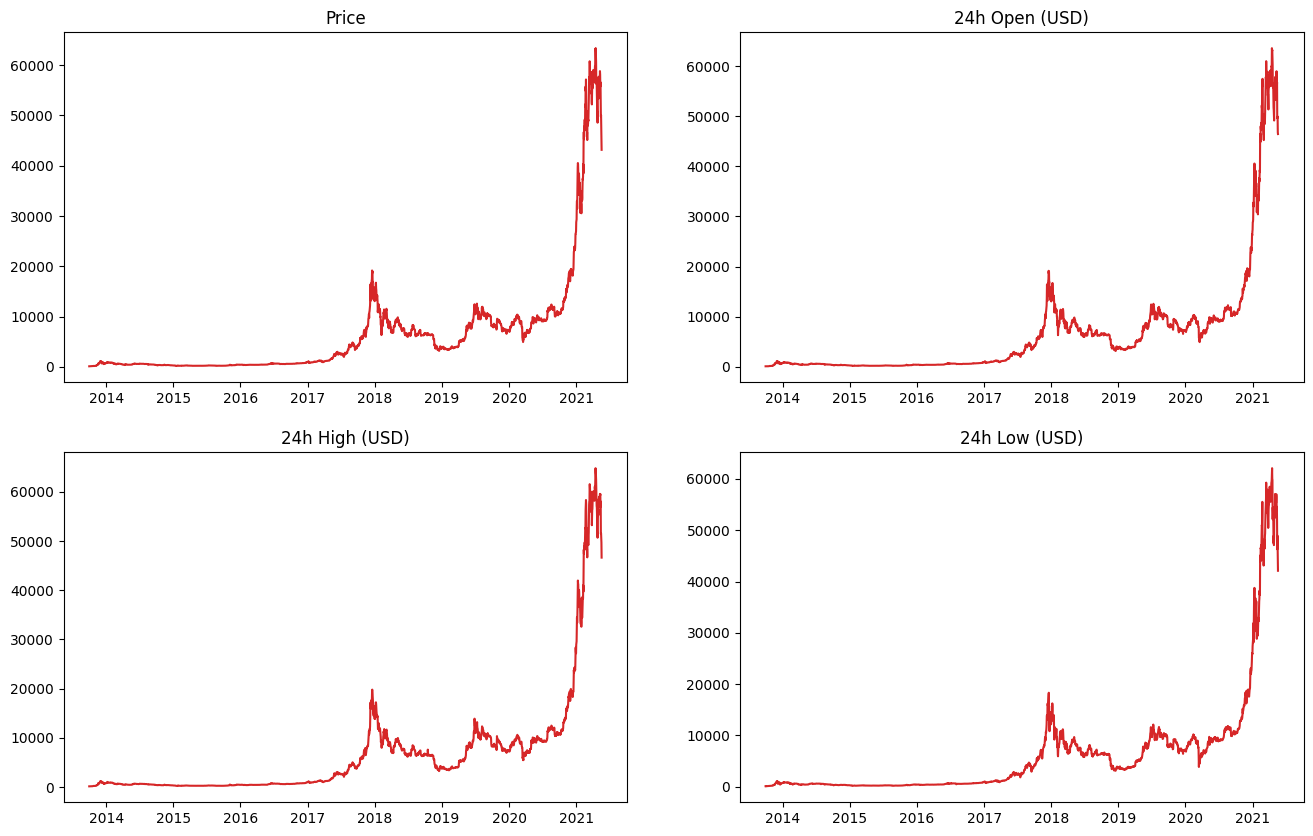

In [469]:
# define a function to take column name as input and plot the data
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show() 

# plot the data for closing price, 24h Open, 24h High, 24h Low as subplots in 2 rows and 2 columns
plt.figure(figsize=(16,10), dpi=100)
plt.subplot(2,2,1)
plt.plot(df.index, df['Price'], color='tab:red')
plt.title('Price')
plt.subplot(2,2,2)
plt.plot(df.index, df['24h Open (USD)'], color='tab:red')
plt.title('24h Open (USD)')
plt.subplot(2,2,3)
plt.plot(df.index, df['24h High (USD)'], color='tab:red')
plt.title('24h High (USD)')
plt.subplot(2,2,4)
plt.plot(df.index, df['24h Low (USD)'], color='tab:red')
plt.title('24h Low (USD)')
plt.show()

In [470]:
# Is all the columns are correlated?
df.corr()

,Price,24h Open (USD),24h High (USD),24h Low (USD)
Price,1.000000,0.998892,0.999527,0.999403
24h Open (USD),0.998892,1.000000,0.999476,0.999096
24h High (USD),0.999527,0.999476,1.000000,0.999028
24h Low (USD),0.999403,0.999096,0.999028,1.000000


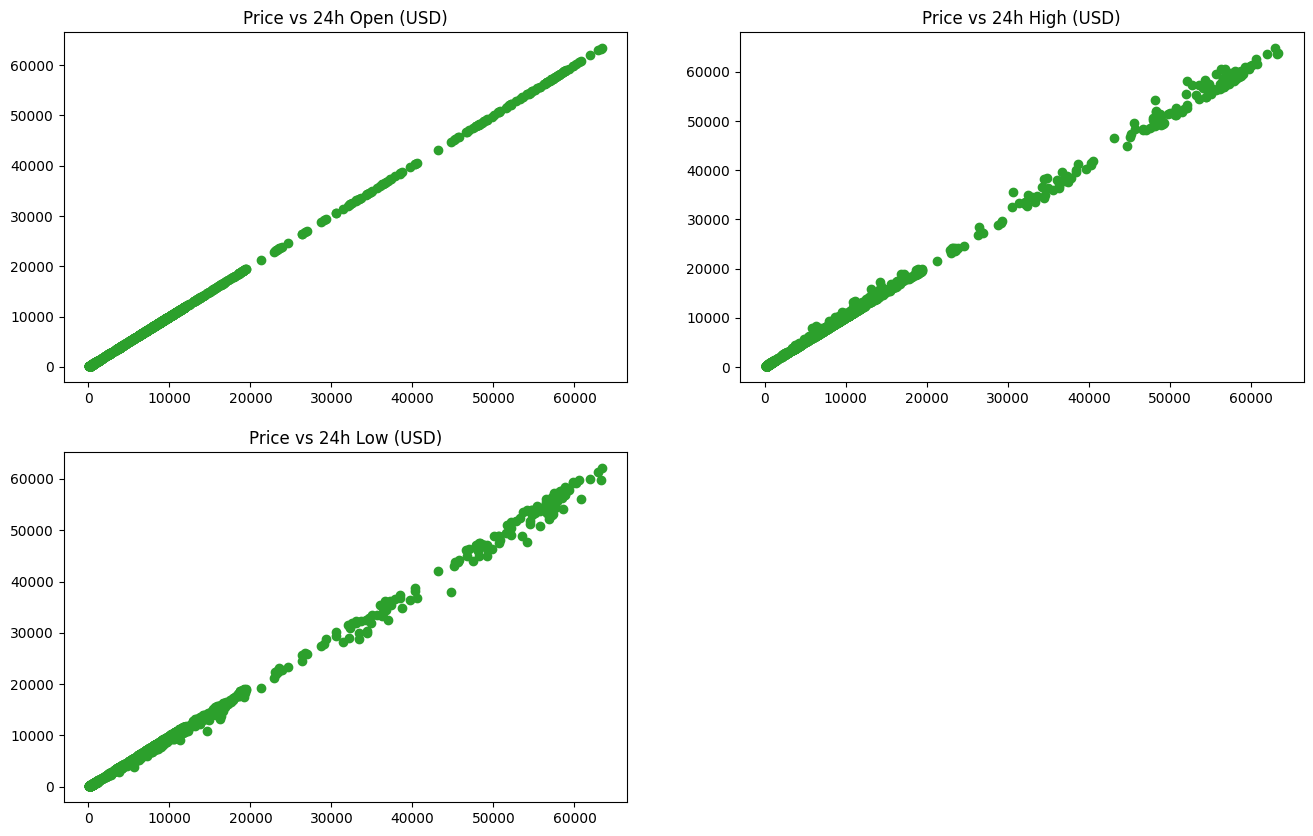

In [471]:
# scatter plot for all the columns as subplots in 2 rows and 2 columns
plt.figure(figsize=(16,10), dpi=100)
plt.subplot(2,2,1)
plt.scatter(df['Price'], df['Price'], color='tab:green')
plt.title('Price vs 24h Open (USD)')
plt.subplot(2,2,2)
plt.scatter(df['Price'], df['24h High (USD)'], color='tab:green')
plt.title('Price vs 24h High (USD)')
plt.subplot(2,2,3)
plt.scatter(df['Price'], df['24h Low (USD)'], color='tab:green')
plt.title('Price vs 24h Low (USD)')
plt.show()

# Split Data

In [472]:
# total number of samples
len(df)

2787

In [473]:
# split the data into train and test
split_size = int(len(df) * 0.8)
train_df = df[:split_size]
test_df = df[split_size:]
len(train_df), len(test_df)

(2229, 558)

In [474]:
# Percentage of train and test data
print(f"Percentage of train data: {len(train_df)/len(df)*100:.2f}%")
print(f"Percentage of test data: {len(test_df)/len(df)*100:.2f}%")

Percentage of train data: 79.98%
Percentage of test data: 20.02%


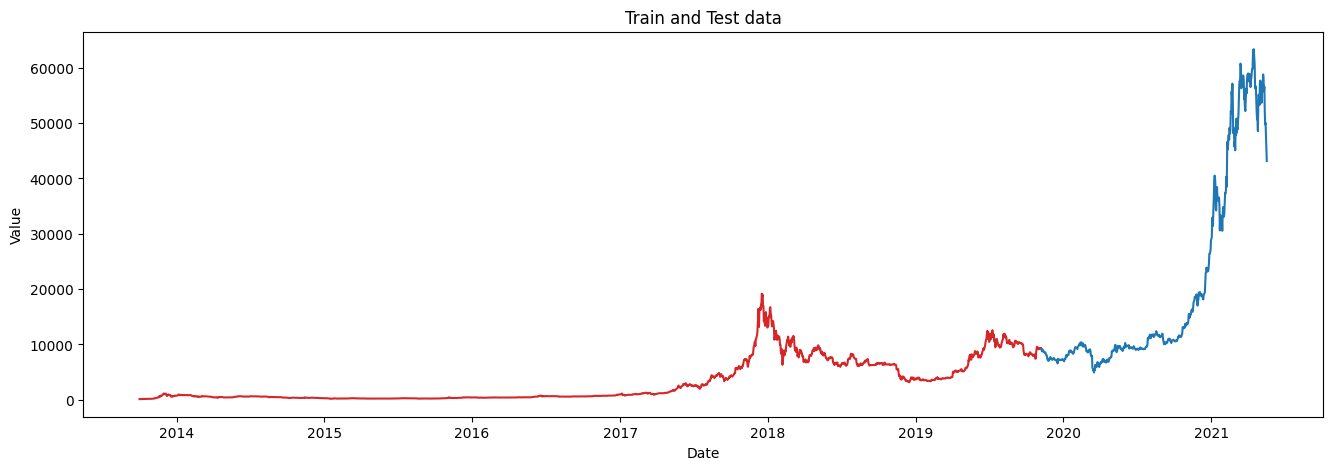

In [475]:
# plot the train and test data as function of time with start and end date
def plot_train_test(train_df, test_df, title="", xlabel='Date', ylabel='Value', start=0, end=None, dpi=100):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(train_df.index[start:end], train_df['Price'][start:end], color='tab:red')
    plt.plot(test_df.index, test_df['Price'], color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_train_test(train_df, test_df, start=0, end=None,title='Train and Test data')


In [476]:
# get X_train, y_train, X_test, y_test
X_train, y_train = train_df.drop(['Price','Currency'], axis=1), train_df['Price']
X_test, y_test = test_df.drop(['Price','Currency'], axis=1), test_df['Price']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229, 3), (2229,), (558, 3), (558,))

# Prediction Models

* Model 0 : Naive Model (baseline)
* Model 1 : Dense Model , Horizon = 1, window_size = 7
* Model 2 : Same as Model 1 , Horizon = 1, window_size = 30
* Model 3 : Same as Model 1 , Horizon = 7, window_size = 30
* Model 4 : Conv1D
* Model 5 : LSTM
* Model 6 : Same as Model 1 with multivariate data
* Model 7 : N-BEATS Algorithm
* Model 8 : Ensemble Model
* Model 9 : Future Prediction Model
* Model 10 : Same as Model 1 with turkey data

## Helper Functions

#### Evaluation Metrics

In [477]:
# A function to get Evaluation Metrics Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Mean absolute percentage error,
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# A custom function to calculate mean_absolute_scaled_error.
def mean_absolute_scaled_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mase = mae / mean_absolute_error(y_true[1:], y_true[:-1])
    return mase

def evaluate_preds(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mase = mean_absolute_scaled_error(y_true, y_pred)
    metric_dict = {"mae": round(mae,2),
                   "mse": round(mse,2),
                   "rmse": round(rmse,2),
                   "mape": round(mape,2),
                   "mase": round(mase,2)
                   }
    return metric_dict

#### Plot the model forcast curve

In [478]:
# plot the naive_forcast and y_test as function of time with start and end date
def plot_forcast(y_test, y_pred, title="", xlabel='Date', ylabel='Value', start=0, end=None, dpi=100):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(y_test.index[start:end], y_test[start:end], color='tab:red')
    plt.plot(y_test.index[start:end], y_pred[start:end], color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

### Windowing Data set

In [479]:
def get_window_data(y_train,y_test, window_size, horizon):
    X_train_windowed = []
    y_train_Horizons = []
    for i in range(window_size,len(y_train)-horizon+1):
        X_train_windowed.append(y_train[i-window_size:i])
        y_train_Horizons.append(y_train[i:i+horizon])
    X_train_windowed = np.array(X_train_windowed)
    y_train_Horizons = np.array(y_train_Horizons)

    print(f"X_train_windowed shape: {X_train_windowed.shape}")
    print(f"y_train_Horizons shape: {y_train_Horizons.shape}")

    X_test_windowed = []
    y_test_Horizons = []
    for i in range(window_size,len(y_test)-horizon+1):
        X_test_windowed.append(y_test[i-window_size:i])
        y_test_Horizons.append(y_test[i:i+horizon])
    X_test_windowed = np.array(X_test_windowed)
    y_test_Horizons = np.array(y_test_Horizons)
    print(f"X_test_windowed shape: {X_test_windowed.shape}")
    print(f"y_test_Horizons shape: {y_test_Horizons.shape}")
    return X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons

In [480]:
# test with sample data to check the output of get_window_data function
y_sample_train = np.arange(100)
y_sample_test = np.arange(100,120)
print(y_sample_train)
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_sample_train,y_sample_test,
                                                                                       window_size=30, horizon=7)

# print the sample of X_train_windowed and y_train_Horizons as data frame
df_sample_test = pd.DataFrame(columns=['Window','Label'])
for (x_sample,y_sample) in zip(X_train_windowed, y_train_Horizons):
    df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)

df_sample_test

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
X_train_windowed shape: (64, 30)
y_train_Horizons shape: (64, 7)
X_test_windowed shape: (0,)
y_test_Horizons shape: (0,)


/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel_99664/3549606945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)
/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel_99664/3549606945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)
/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel_99664/3549606945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)
/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel

,Window,Label
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[30, 31, 32, 33, 34, 35, 36]"
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[31, 32, 33, 34, 35, 36, 37]"
2,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[32, 33, 34, 35, 36, 37, 38]"
3,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[33, 34, 35, 36, 37, 38, 39]"
4,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[34, 35, 36, 37, 38, 39, 40]"
...,...,...
59,"[59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7...","[89, 90, 91, 92, 93, 94, 95]"
60,"[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...","[90, 91, 92, 93, 94, 95, 96]"
61,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...","[91, 92, 93, 94, 95, 96, 97]"
62,"[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 7...","[92, 93, 94, 95, 96, 97, 98]"


## Model 0 : Naive Model (baseline)

In [481]:
# Naive Model predict the next day price as today's price
naive_forcast = y_test.shift(1)
# data frame of naive_forcast and y_test
pd.DataFrame({'naive_forcast':naive_forcast, 'y_test':y_test})

,naive_forcast,y_test
Date,,
2019-11-08,NaN,9226.485821
2019-11-09,9226.485821,8794.358645
2019-11-10,8794.358645,8798.042055
2019-11-11,8798.042055,9081.186878
2019-11-12,9081.186878,8711.534339
...,...,...
2021-05-14,52147.821187,49764.132082
2021-05-15,49764.132082,50032.693137
2021-05-16,50032.693137,47885.625255


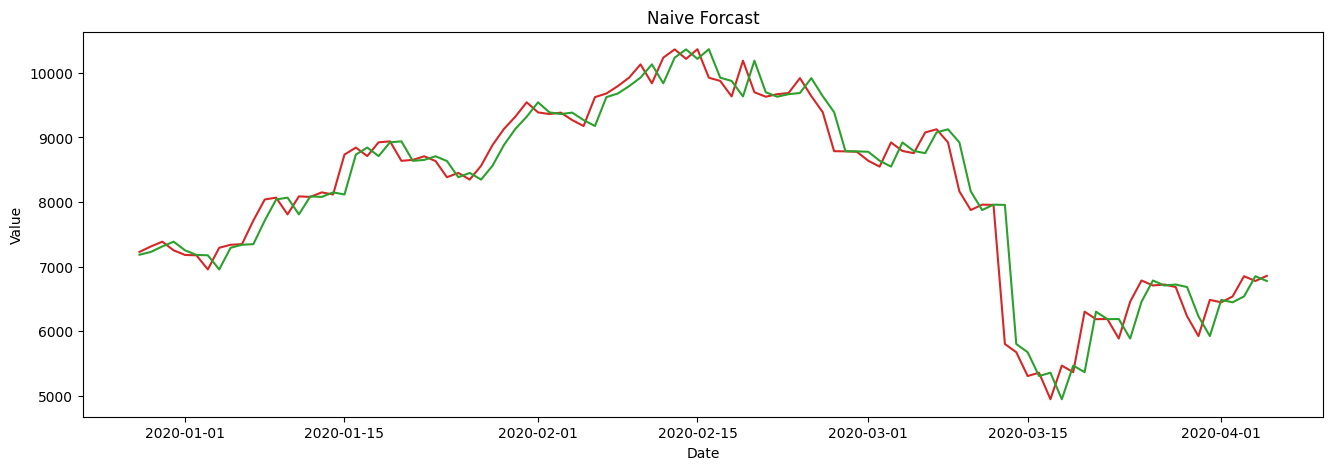

In [482]:
plot_forcast(y_test, naive_forcast, start=50, end=150,title='Naive Forcast')

In [483]:
# get the evaluation metrics for naive_forcast
naive_forcast_metrics = evaluate_preds(y_test[1:], naive_forcast[1:])
naive_forcast_metrics

{'mae': 567.98, 'mse': 1147547.13, 'rmse': 1071.24, 'mape': 2.52, 'mase': 1.0}

## Model 1 : Dense Model,  Horizon = 1, window_size = 7

In [484]:
# define a dense model with horizon and window_size as input
import tensorflow as tf
tf.random.set_seed(42)
def dense_model(horizon, window_size):
    model = tf.keras.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(window_size)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(horizon, activation='linear')
                                ])
    return model

model_1 = dense_model(horizon=1, window_size=7)
model_1.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 128)               1024      
                                                                 
 dense_59 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [485]:
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_train,y_test, window_size=7, horizon=1)

X_train_windowed shape: (2222, 7)
y_train_Horizons shape: (2222, 1)
X_test_windowed shape: (551, 7)
y_test_Horizons shape: (551, 1)


In [486]:
# compile the model
from helper_functions import prepare_checkpoint_call_back
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# fit the model
history_1 = model_1.fit(X_train_windowed, y_train_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_windowed, y_test_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_1_Horizon_1_window_size_7")])

Saving Checkpoints to files :  model_check_point_logs/model_1_Horizon_1_window_size_7
Epoch 1/100
18/18 [==============================] - 1s 38ms/step - loss: 784.5053 - mae: 784.5053 - mse: 2277419.2500 - val_loss: 2606.8135 - val_mae: 2606.8135 - val_mse: 15897949.0000
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 260.5649 - mae: 260.5649 - mse: 293451.6562 - val_loss: 1028.3044 - val_mae: 1028.3044 - val_mse: 3474395.7500
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 190.2076 - mae: 190.2076 - mse: 182563.0156 - val_loss: 1034.0643 - val_mae: 1034.0643 - val_mse: 3398892.0000
Epoch 4/100
18/18 [==============================] - 1s 33ms/step - loss: 181.3003 - mae: 181.3003 - mse: 172684.2031 - val_loss: 984.2569 - val_mae: 984.2569 - val_mse: 3259792.0000
Epoch 5/100
18/18 [==============================] - 1s 46ms/step - loss: 177.1029 - mae: 177.1029 - mse: 164341.3438 - val_loss: 956.5168 - val_mae: 956.5168 - val_mse: 30835

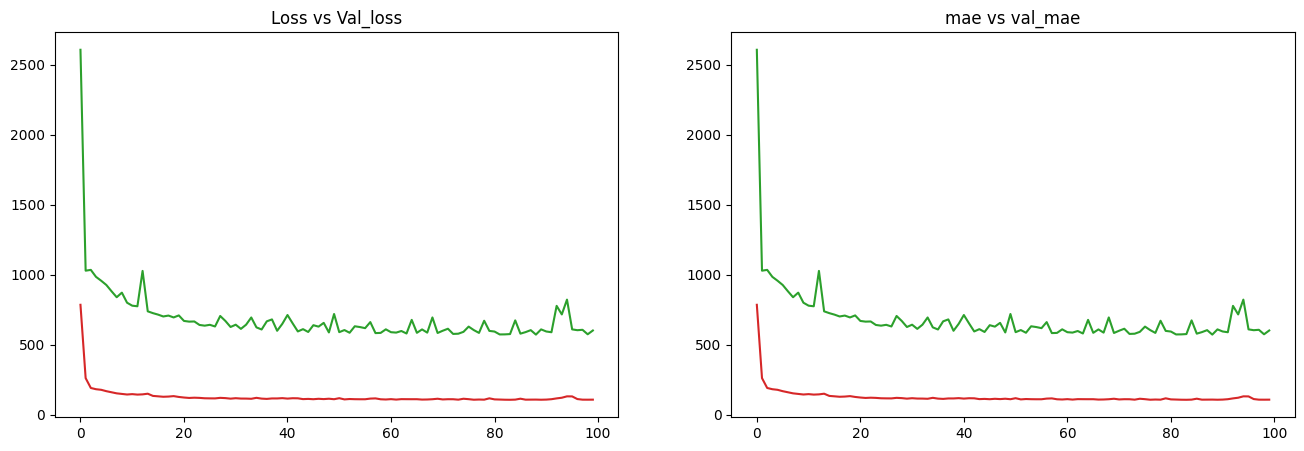

In [487]:
# plot the loss curve
history_1_df = pd.DataFrame(history_1.history)

# sub plots of mae, mse and val_loss
plt.figure(figsize=(16,5), dpi=100)
plt.subplot(1,2,1)
plt.plot(history_1_df['loss'], color='tab:red')
plt.plot(history_1_df['val_loss'], color='tab:green')
plt.title('Loss vs Val_loss')
plt.subplot(1,2,2)
plt.plot(history_1_df['mae'], color='tab:red')
plt.plot(history_1_df['val_mae'], color='tab:green')
plt.title('mae vs val_mae')
plt.show()

In [488]:
# load the model from the checkpoint
model_1 = tf.keras.models.load_model('model_check_point_logs/model_1_Horizon_1_window_size_7')

# save the model
model_1.save('saved_models/model_1_Horizon_1_window_size_7.h5')

In [489]:
# get the evaluation metrics for model_1
model_1.evaluate(X_test_windowed, y_test_Horizons)

18/18 [==============================] - 0s 2ms/step - loss: 571.5701 - mae: 571.5701 - mse: 1185001.2500


[571.5701293945312, 571.5701293945312, 1185001.25]

In [490]:
# y_pred for model_1
y_pred_1 = model_1.predict(X_test_windowed)
y_pred_1 = tf.squeeze(y_pred_1)
y_pred_1.shape , y_test_Horizons.shape

(TensorShape([551]), (551, 1))

In [491]:
model_1_forcast_metrics = evaluate_preds(y_test_Horizons, y_pred_1)
model_1_forcast_metrics

{'mae': 571.57, 'mse': 1185001.0, 'rmse': 1088.58, 'mape': 113.9, 'mase': 1.0}

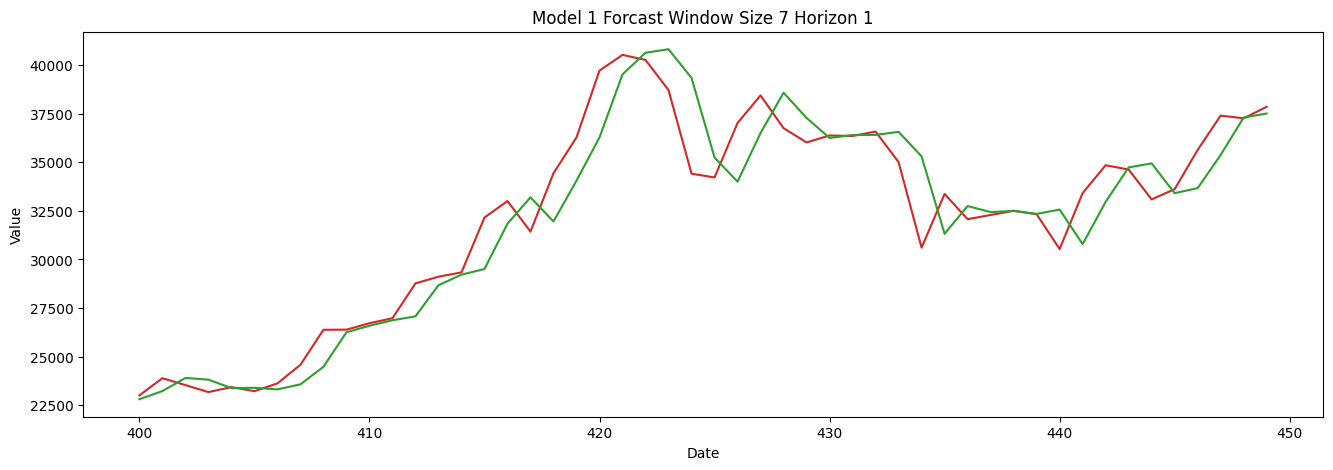

In [492]:
plot_forcast(pd.Series(np.squeeze(y_test_Horizons)), y_pred_1, start=400, end=450,title='Model 1 Forcast Window Size 7 Horizon 1')

## Model 2 : Same as Model 1,  Horizon = 1, window_size = 30

In [493]:
model_2 = dense_model(horizon=1, window_size=30)
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               3968      
                                                                 
 dense_61 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [494]:
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_train,y_test, window_size=30, horizon=1)

X_train_windowed shape: (2199, 30)
y_train_Horizons shape: (2199, 1)
X_test_windowed shape: (528, 30)
y_test_Horizons shape: (528, 1)


In [495]:
# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_2 = model_2.fit(X_train_windowed, y_train_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_windowed, y_test_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_2_Horizon_1_window_size_30")])

Saving Checkpoints to files :  model_check_point_logs/model_2_Horizon_1_window_size_30
Epoch 1/100
18/18 [==============================] - 1s 26ms/step - loss: 1393.9684 - mae: 1393.9684 - val_loss: 2844.5212 - val_mae: 2844.5212
Epoch 2/100
18/18 [==============================] - 0s 22ms/step - loss: 490.7867 - mae: 490.7867 - val_loss: 1785.2551 - val_mae: 1785.2551
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 323.4540 - mae: 323.4540 - val_loss: 1586.0260 - val_mae: 1586.0260
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 271.6756 - mae: 271.6756 - val_loss: 1653.8978 - val_mae: 1653.8978
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 243.8830 - mae: 243.8830 - val_loss: 1647.6276 - val_mae: 1647.6276
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 228.3077 - mae: 228.3077 - val_loss: 1141.9668 - val_mae: 1141.9668
Epoch 7/100
18/18 [==============================] - 0s 2ms/s

In [496]:
# load the model from the checkpoint
model_2 = tf.keras.models.load_model('model_check_point_logs/model_2_Horizon_1_window_size_30')

# save the model
model_2.save('saved_models/model_2_Horizon_1_window_size_30.h5')

In [497]:
# evaluate the model
model_2.evaluate(X_test_windowed, y_test_Horizons)

17/17 [==============================] - 0s 780us/step - loss: 620.7939 - mae: 620.7939


[620.7939453125, 620.7939453125]

In [498]:
# y_pred for model_2
y_pred_2 = model_2.predict(X_test_windowed)
y_pred_2 = tf.squeeze(y_pred_2)
y_pred_2.shape , y_test_Horizons.shape

(TensorShape([528]), (528, 1))

In [499]:
model_2_forcast_metrics = evaluate_preds(y_test_Horizons, y_pred_2)
model_2_forcast_metrics

{'mae': 620.79,
 'mse': 1287159.46,
 'rmse': 1134.53,
 'mape': 114.47,
 'mase': 1.05}

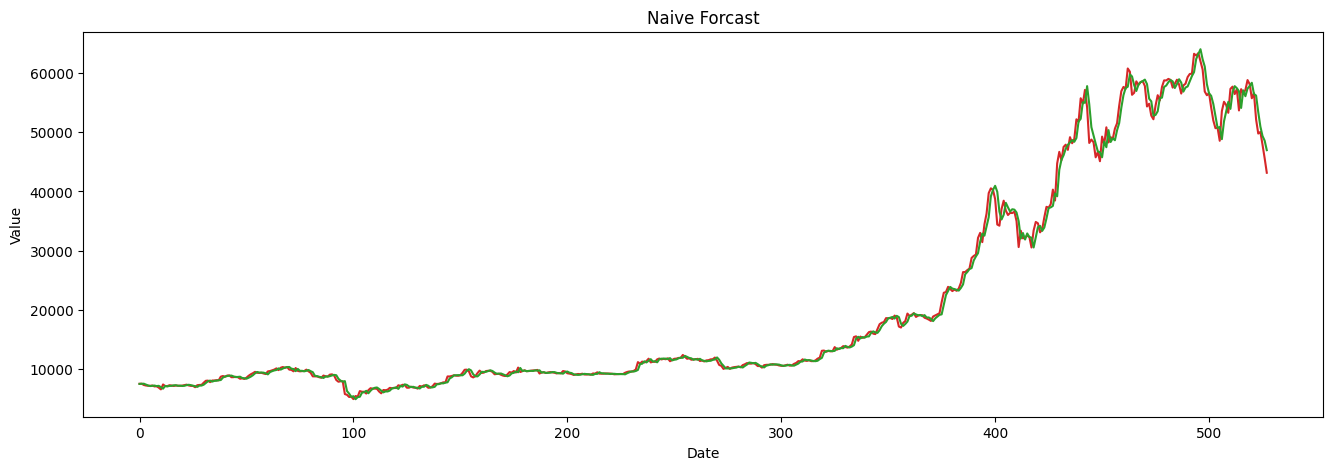

In [500]:
plot_forcast(pd.Series(np.squeeze(y_test_Horizons)), y_pred_2, start=0, end=None,title='Naive Forcast')

## Model 3 : Same as Model 1,  Horizon = 7, window_size = 30

In [501]:
model_3 = dense_model(horizon=7, window_size=30)
model_3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               3968      
                                                                 
 dense_63 (Dense)            (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [502]:
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_train,y_test, window_size=30, horizon=7)

X_train_windowed shape: (2193, 30)
y_train_Horizons shape: (2193, 7)
X_test_windowed shape: (522, 30)
y_test_Horizons shape: (522, 7)


In [503]:
# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_3 = model_3.fit(X_train_windowed, y_train_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_windowed, y_test_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_3_Horizon_7_window_size_30")]
                        )

Saving Checkpoints to files :  model_check_point_logs/model_3_Horizon_7_window_size_30
Epoch 1/100
18/18 [==============================] - 1s 26ms/step - loss: 1152.2496 - mae: 1152.2496 - val_loss: 2685.0720 - val_mae: 2685.0720
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 491.5980 - mae: 491.5980 - val_loss: 2661.9724 - val_mae: 2661.9724
Epoch 3/100
18/18 [==============================] - 0s 23ms/step - loss: 389.2799 - mae: 389.2799 - val_loss: 1961.9523 - val_mae: 1961.9523
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 349.8660 - mae: 349.8660 - val_loss: 1994.7764 - val_mae: 1994.7764
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 321.8861 - mae: 321.8861 - val_loss: 1772.7094 - val_mae: 1772.7094
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - loss: 300.3519 - mae: 300.3519 - val_loss: 1715.4087 - val_mae: 1715.4087
Epoch 7/100
18/18 [==============================] - 0s 2ms/

In [504]:
# load the model from the checkpoint
model_3 = tf.keras.models.load_model('model_check_point_logs/model_3_Horizon_7_window_size_30')

# save the model
model_3.save('saved_models/model_3_Horizon_7_window_size_30.h5')

In [505]:
# evaluate the model
model_3.evaluate(X_test_windowed, y_test_Horizons)

17/17 [==============================] - 0s 999us/step - loss: 1282.4977 - mae: 1282.4977


[1282.4976806640625, 1282.4976806640625]

In [506]:
# y_pred for model_3
y_pred_3 = model_3.predict(X_test_windowed)
y_pred_3 = tf.squeeze(y_pred_3)
y_pred_3.shape , y_test_Horizons.shape

(TensorShape([522, 7]), (522, 7))

In [507]:
model_3_forcast_metrics = evaluate_preds(y_test_Horizons, y_pred_3)
model_3_forcast_metrics

{'mae': 1282.5, 'mse': 5596707.33, 'rmse': 2365.74, 'mape': 5.57, 'mase': 2.19}

## Model 4 : Conv1D

## Model 5 : LSTM

## Model 6 : Same as Model 1 with multivariate data

## Model 7 : N-BEATS Algorithm

## Model 8 : Ensemble Model

## Model 9 : Future Prediction Model

## Model 10 : Same as Model 1 with turkey data

# Evaluation of all Models

In [508]:
# Collect all the evaluation metrics for all the models as a data frame
model_evaluation_metrics = pd.DataFrame(
                                        {
                                            'naive_forcast':naive_forcast_metrics,
                                            'Dense_model_Horizon_1_window_size_7':model_1_forcast_metrics,
                                            'Dense_model_Horizon_1_window_size_30':model_2_forcast_metrics,
                                            'Dense_model_Horizon_7_window_size_30':model_3_forcast_metrics,
                                         },

                                        index=['mae', 'mse', 'rmse', 'mape', 'mase'])
model_evaluation_metrics.transpose()

,mae,mse,rmse,mape,mase
naive_forcast,567.98,1147547.13,1071.24,2.52,1.00
Dense_model_Horizon_1_window_size_7,571.57,1185001.00,1088.58,113.90,1.00
Dense_model_Horizon_1_window_size_30,620.79,1287159.46,1134.53,114.47,1.05
Dense_model_Horizon_7_window_size_30,1282.50,5596707.33,2365.74,5.57,2.19
